# Create individual parts of the logic gate separately and test them
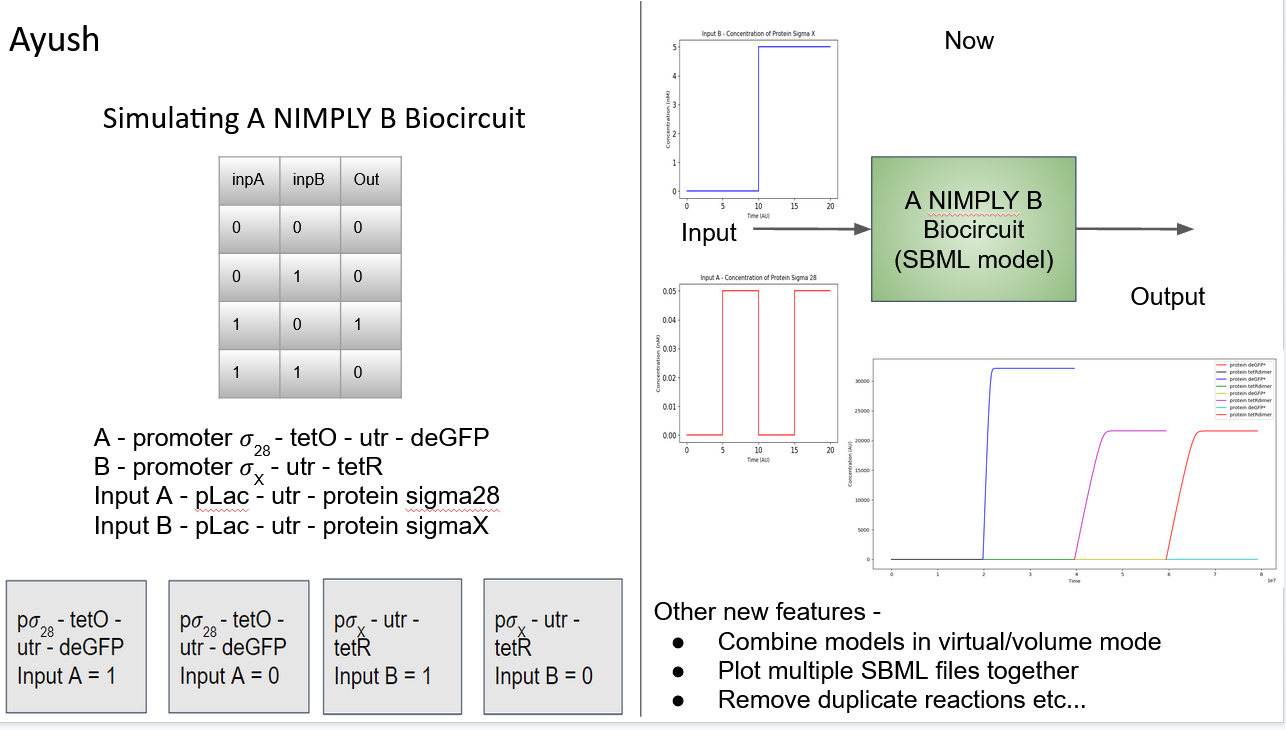
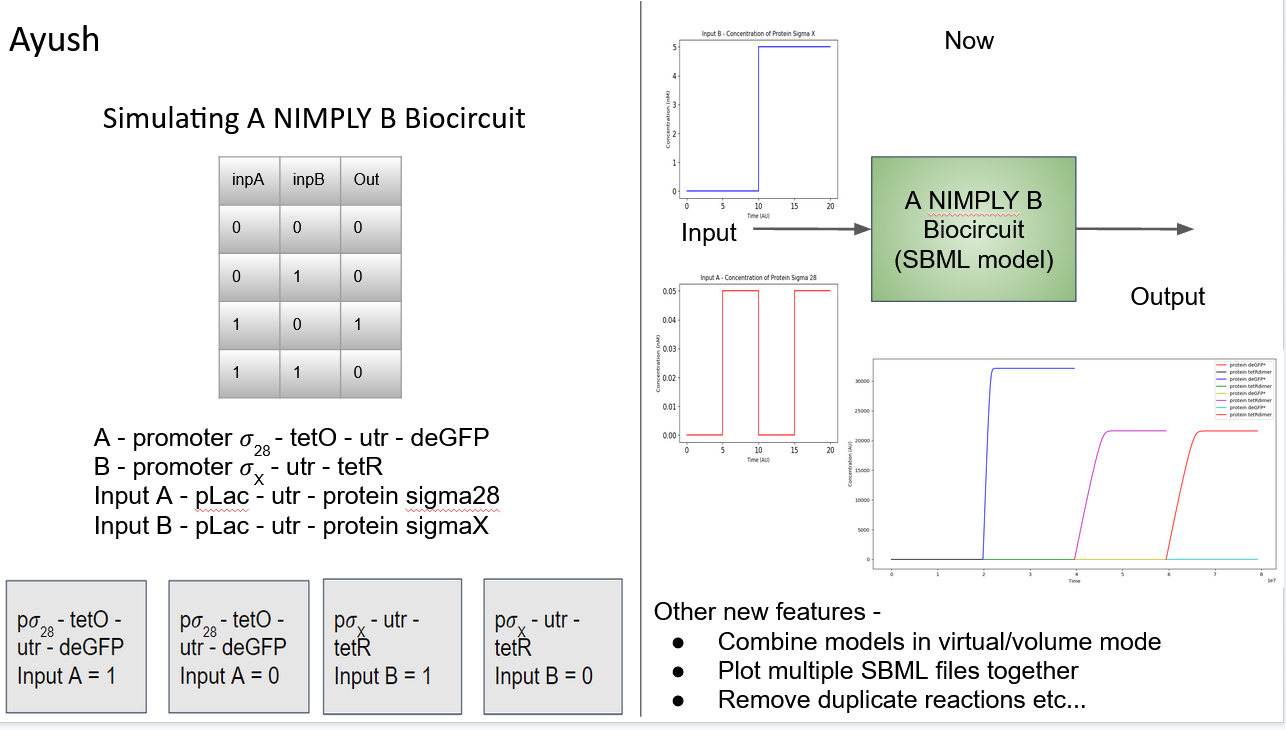

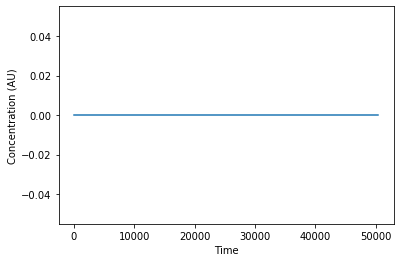

In [3]:
# Create a subsystem with the first part of the logic gate

# A0 implies zero input - so no output is predicted
import numpy as np
import libsbml
from subsbml.System import System

cell = System('cell')
# A0 - promoter sig28 -tetO - utr1 - deGFP
A0 = cell.createSubsystem('models/A0.xml','A0')
# SBML model gets converted to Level 3 Version 2
# libsbml.writeSBML(A0.getSBMLDocument(),'models/A0converted.xml')
# Simulate using bioscrape
try:
    import matplotlib.pyplot as plt
    timepoints = np.linspace(0,14*60*60,1000)
    GFP_id = A0.getSpeciesByName('protein deGFP*').getId()
    results, _ = A0.simulateWithBioscrape(timepoints)
    plt.plot(timepoints, results[GFP_id])
    plt.xlabel('Time')
    plt.ylabel('Concentration (AU)')
    plt.show()
except:
    print('Simulator not found.')

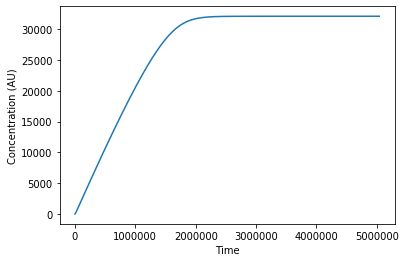

In [4]:
#A1 - output - True
import numpy as np


cell = System('cell')
cell.ListOfSharedResources = ['RNAP','Ribo','ATP']

# A1 - promoter sig28 -tetO - utr1 - deGFP
# A1 - pLac - utr1 - sigma28 (constituitively expressed protein sigma28 - input plasmid)
A1 = cell.createSubsystem('models/A1.xml','A1')
# SBML model gets converted to Level 3 Version 1
libsbml.writeSBML(A1.getSBMLDocument(),'models/A1converted.xml')
try:
    # Simulate using bioscrape
    timepoints = np.linspace(0,14*60*6000,1000)


    GFP_id = A1.getSpeciesByName('protein deGFP*').getId()
    results, _ = A1.simulateWithBioscrape(timepoints)

    import matplotlib.pyplot as plt
    plt.plot(timepoints, results[GFP_id])
    plt.xlabel('Time')
    plt.ylabel('Concentration (AU)')
    plt.show()
except:
    print('Simulator not found.')

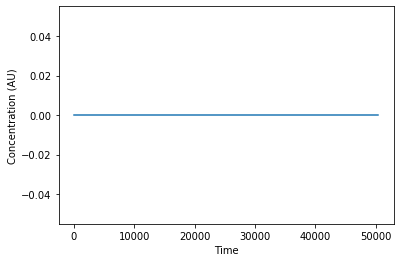

In [5]:
#B0 - output - tetR - off
import numpy as np

cell = System('cell')
# B0 - promoter sigX - utr1 - tetR
B0 = cell.createSubsystem('models/B0.xml','B0')
# SBML model gets converted to Level 3 Version 1
libsbml.writeSBML(B0.getSBMLDocument(),'models/B0converted.xml')
try:
    # Simulate using bioscrape
    timepoints = np.linspace(0,14*60*60,1000)


    tetR_id = B0.getSpeciesByName('protein tetRdimer').getId()

    results, _ = B0.simulateWithBioscrape(timepoints)

    import matplotlib.pyplot as plt
    plt.plot(timepoints, results[tetR_id])
    plt.xlabel('Time')
    plt.ylabel('Concentration (AU)')
    plt.show()
except:
    print('Simulator not found.')

odeint failed with mxstep=500...

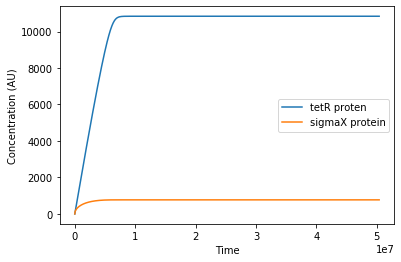

In [6]:
# B1 - outputs plotted tetR and sigmaX - both ON
import numpy as np


cell = System('cell')

# B1 - promoter sigX - utr1 - tetR
# B1 - pLac - utr1 - sigmaX (constituitively expressed protein sigmaX - input plasmid)
B1 = cell.createSubsystem('models/B1.xml','B1')
# SBML model gets converted to Level 3 Version 1
libsbml.writeSBML(B1.getSBMLDocument(),'models/B1converted.xml')
try:
    # Simulate using bioscrape
    timepoints = np.linspace(0,14*60*60000,1000)


    tetR_id = B1.getSpeciesByName('protein tetRdimer').getId()
    sigmaX_id = B1.getSpeciesByName('protein sigmaX').getId()
    results, _ = B1.simulateWithBioscrape(timepoints)

    import matplotlib.pyplot as plt
    plt.plot(timepoints, results[tetR_id], label = 'tetR proten')
    plt.plot(timepoints, results[sigmaX_id], label = 'sigmaX protein')
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel('Concentration (AU)')
    plt.show()
except:
    print('Simulator not found.')

# Assembling the logic gate

(Since the models contain SBML events, bioscrape cannot simulate the model correctly. In particular, protein degradation is implemented using SBML events so in the simulation results that you will see the proteins do not degrade)

In [8]:
import numpy as np
from subsbml.Subsystem import createNewSubsystem

cell = System('cell')
# cell.ListOfSharedResources = ['RNAP']
A0 = cell.createSubsystem('models/A0.xml','A0')
A1 = cell.createSubsystem('models/A1.xml','A1')
B0 = cell.createSubsystem('models/B0.xml','B0')
B1 = cell.createSubsystem('models/B1.xml','B1')

AnB = cell.createSubsystem('models/AnimplyB.xml','AnB')
libsbml.writeSBML(AnB.getSBMLDocument(), 'models/AnimplyB_mod.xml')

combined00 = createNewSubsystem()
combined00.combineSubsystems([A0, B0],True, 'virtual')
combined00.writeSBML('models/combined00.xml')

combined01 = createNewSubsystem()
combined01.combineSubsystems([A0,B1],True, 'volume')
combined01.writeSBML('models/combined01.xml')

combined10 = createNewSubsystem()
combined10.combineSubsystems([A1, B0],True, 'volume')
combined10.writeSBML('models/combined10.xml')


combined11 = createNewSubsystem()
combined11.combineSubsystems([A1, B1],True, 'virtual')
combined11.writeSBML('models/combined11.xml')

try:
    # Simulate using bioscrape
    t_end = 14*60*60
    points = 1200 
    timepoints = np.linspace(0, t_end, points)

    combined = createNewSubsystem()
    combined.combineSubsystems([A1, B1],True, 'virtual')

    # Simulation options

    # ListOfInputs = ['DNA plac--utr1--sigma28','DNA plac--utr1--sigmaX']
    # ListOfListOfAmounts = [[0,0],[0.05,0],[0,1.1],[0.05,5]]
    # ListOfSpeciesToPlot = ['protein deGFP*', 'protein tetRdimer']
    # ListOfSpeciesToPlot = ['protein deGFP', 'protein sigma28', 'protein sigmaX', 'protein deGFP*', 'protein tetR', 'protein tetRdimer']
    # _ = combined.simulateVariableInputs(ListOfInputs, ListOfListOfAmounts, ListOfSpeciesToPlot, timepoints, mode = 'reset')

    # # Single input
    # input = 'DNA plac--utr1--sigmaX'
    # amounts = [0,5]
    # ListOfSpeciesToPlot = ['protein deGFP*', 'protein tetRdimer']
    # _ = combined.simulateVariableInputs(input, amounts, ListOfSpeciesToPlot, timepoints, mode = 'reset')
except:
    print('Simulator not found.')